In [1]:
import os
import sys
import shutil

import numpy as np

import matplotlib.pyplot as plt
import urllib, json
%matplotlib inline
from IPython.display import display, Markdown, Latex
import tabulate

import re
import operator
from itertools import izip

#sys.path.append('../mcl/')
#from utilitites.digits_interface import load_digits_model

In [62]:
import os
import sqlite3
import matplotlib.pyplot as plt


experiments_folder = './'
db_path = os.path.join(experiments_folder, 'experiments.db')
data_folder = os.path.join(experiments_folder, 'data')


db = sqlite3.Connection(db_path)

In [74]:

query_params = '''
SELECT net_id,  
			  sum((1-lock)*nparams) nparams_free,
			  sum(lock*nparams) nparams_locked,
			  sum(trans * nparams) nparams_trans,
			  sum(nparams) nparams
FROM layers
GROUP BY net_id
'''

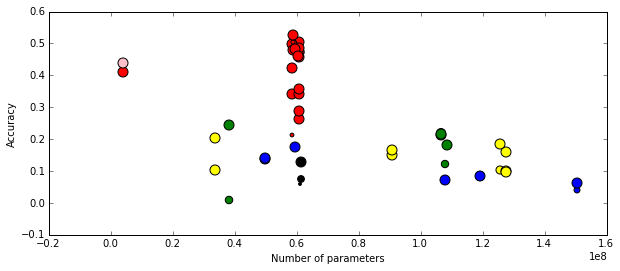

In [75]:
query = '''
        SELECT net_id, name, nparams_free, accuracy_val_last accuracy, progress, nparams_trans                
        FROM networks NATURAL JOIN (%s)
        WHERE nparams < 4E8                
        GROUP BY net_id        
        ''' % (query_params)

default_color = 'black'
source_color_map = {
    'a4_m2_s1s2_f2':'yellow',
    'a4_m3_s1s2s4_f2':'blue',
    'a4_m2_s1s2s4s8_f2':'green',
    'raw':'red'
}

plt.figure(figsize=(10,4))
for r in db.execute(query):
    nparams = r[2]
    accuracy = r[3]
    transfer_layers = r[5]        
    progress = r[4]
    
    color = source_color_map.get(r[1].split()[0], default_color)    
    
    if r[1] == 'raw l:fc7 c:fc8':
        color = 'pink'        
    
    plt.scatter(nparams, accuracy,c=color,s=progress)    
plt.xlabel('Number of parameters')
plt.ylabel('Accuracy')

In [76]:
query = '''
        SELECT net_id, name, sum(layers.nparams) nparams, accuracy_val_last accuracy        
        FROM layers NATURAL JOIN networks
        WHERE lock<1 AND nparams < 4E8 AND accuracy > .4
        GROUP BY net_id        
        '''

plt.figure(figsize=(10,4))
for r in db.execute(query):
    print r    

(u'20160624-182808-811a', u'raw Alex t:fc7 c:fc8', 60830023, 0.505833)
(u'20160625-001322-6968', u'raw Alex t:conv4 c:conv5', 60830023, 0.473929)
(u'20160704-065721-1c42', u'raw Alex l:conv5 c:conv6', 58495943, 0.421875)
(u'20160704-090616-ca2e', u'raw AlexNetTransfer', 60830023, 0.472957)
(u'20160704-104545-8c3e', u'raw caffenet_trans_cleanFF_lockConv_new', 58495943, 0.499524)
(u'20160705-072003-d85d', u'raw l:fc7 c:fc8', 3961799, 0.439167)
(u'20160705-075154-d89f', u'raw l:conv4 c:conv5', 58938567, 0.503452)
(u'20160705-091349-2744', u'raw t:fc7 l:conv4 c:fc8', 58938567, 0.526548)
(u'20160705-131412-ff07', u'raw l:conv4 c:conv5', 58938567, 0.480714)
(u'20160705-214703-ac3e', u'raw t:conv3 c:conv4', 60830023, 0.485714)
(u'20160705-214733-e267', u'raw t:conv2 c:conv3', 60830023, 0.458809)
(u'20160705-214758-e0a4', u'raw l:conv3 c:conv4', 59602503, 0.483929)
(u'20160705-214810-44a7', u'raw l:conv2 c:conv3', 60487623, 0.459881)
(u'20160708-003123-0d2e', u'raw Alex l:fc7 c:fc8', 3961799, 